<font color="BLue" size=+3 face="Comic Sans MS"><div style="text-align: justify">Importation Des Données
</font>

In [46]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as  plt

df = pd.read_csv('data_sagem.csv')
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


<font color="Blue" size=+3 face="Comic Sans MS"><div style="text-align: justify">Nettoyage Des Données
</font>

In [47]:
df.dropna(inplace=True)  
df.drop_duplicates(inplace=True)

In [48]:
#On va convertir la température de Kelvin à Celsius 
df['Air temperature [°C]'] = df['Air temperature [K]'] - 273.15
df['Process temperature [°C]'] = df['Process temperature [K]'] - 273.15
df.drop(['Air temperature [K]', 'Process temperature [K]'], axis=1, inplace=True)

#on va réorganiser notre dataframe 
ordre_colonnes = [
    'UDI' ,
    'Product ID' , 
    'Type',
    'Air temperature [°C]',
    'Process temperature [°C]',
    'Rotational speed [rpm]',
    'Torque [Nm]',
    'Tool wear [min]',
    'Target',
    'Failure Type'
]
df = df[ordre_colonnes]
df.head()


,UDI,Product ID,Type,Air temperature [°C],Process temperature [°C],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,24.95,35.45,1551,42.8,0,0,No Failure
1,2,L47181,L,25.05,35.55,1408,46.3,3,0,No Failure
2,3,L47182,L,24.95,35.35,1498,49.4,5,0,No Failure
3,4,L47183,L,25.05,35.45,1433,39.5,7,0,No Failure
4,5,L47184,L,25.05,35.55,1408,40.0,9,0,No Failure


In [49]:
df['Failure Type'].value_counts()

Failure Type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64

<font color="brown" size=+1 face="Comic Sans MS"><div style="text-align: justify">Encodage Des Données
</font>

In [50]:
# Encodage one-hot de la colonne 'Type' & 'Failure Type' car ils sont des données catégorielles
df = pd.get_dummies(df, columns=['Type'])                # drop_first=True si on veut eviter la multicolinéarité (correlation forte entre 2 features == presque similaire)
df = pd.get_dummies(df, columns=['Failure Type'])
df.head()

,UDI,Product ID,Air temperature [°C],Process temperature [°C],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Type_H,Type_L,Type_M,Failure Type_Heat Dissipation Failure,Failure Type_No Failure,Failure Type_Overstrain Failure,Failure Type_Power Failure,Failure Type_Random Failures,Failure Type_Tool Wear Failure
0,1,M14860,24.95,35.45,1551,42.8,0,0,False,False,True,False,True,False,False,False,False
1,2,L47181,25.05,35.55,1408,46.3,3,0,False,True,False,False,True,False,False,False,False
2,3,L47182,24.95,35.35,1498,49.4,5,0,False,True,False,False,True,False,False,False,False
3,4,L47183,25.05,35.45,1433,39.5,7,0,False,True,False,False,True,False,False,False,False
4,5,L47184,25.05,35.55,1408,40.0,9,0,False,True,False,False,True,False,False,False,False


<font color="Blue" size=+3 face="Comic Sans MS"><div style="text-align: justify">Visualisation Des Données
</font>

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(palette='tab10',
              font='Lucida Calligraphy',
              font_scale=1.5,
              rc=None)

import matplotlib
matplotlib.rcParams.update({'font.size': 15})


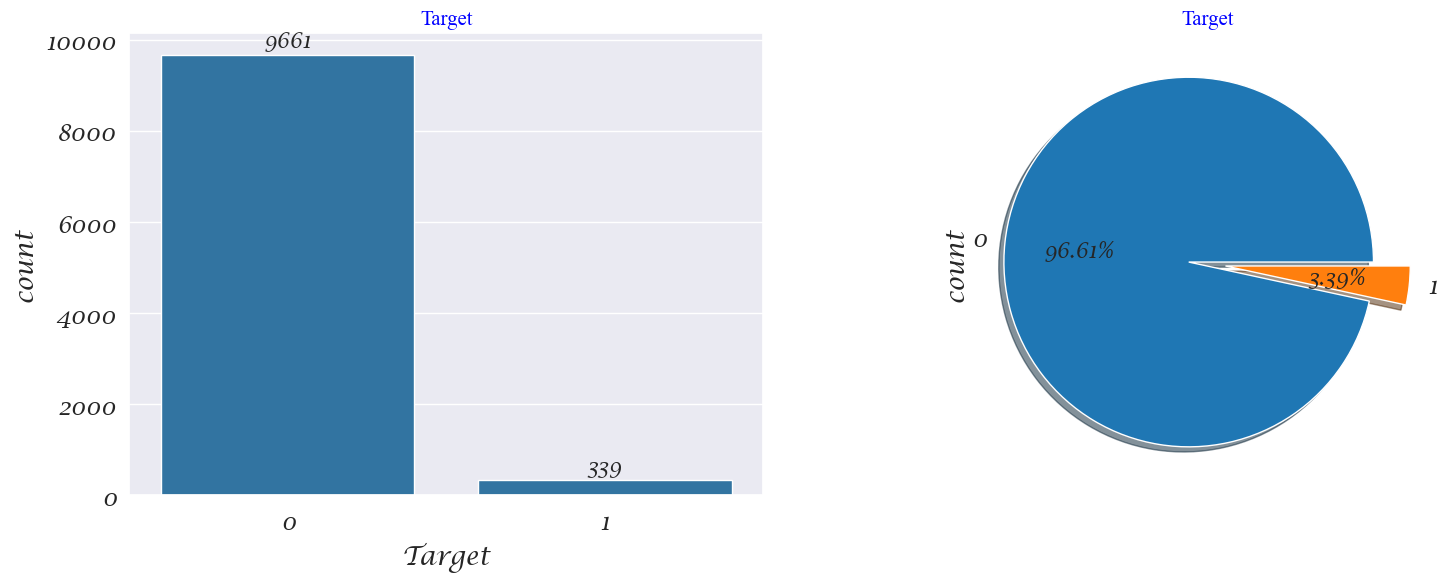

In [52]:
x = plt.figure(figsize=(18,6))
ax = plt.subplot(1,2,1)
ax = sns.countplot(x='Target', data=df)
ax.bar_label(ax.containers[0])
plt.title("Target", fontsize=20,color='blue',font='Times New Roman')
ax =plt.subplot(1,2,2)
ax=df['Target'].value_counts().plot.pie(explode=[0.1, 0.1],autopct='%1.2f%%',shadow=True);
ax.set_title(label = "Target", fontsize = 20,color='blue',font='Times New Roman');

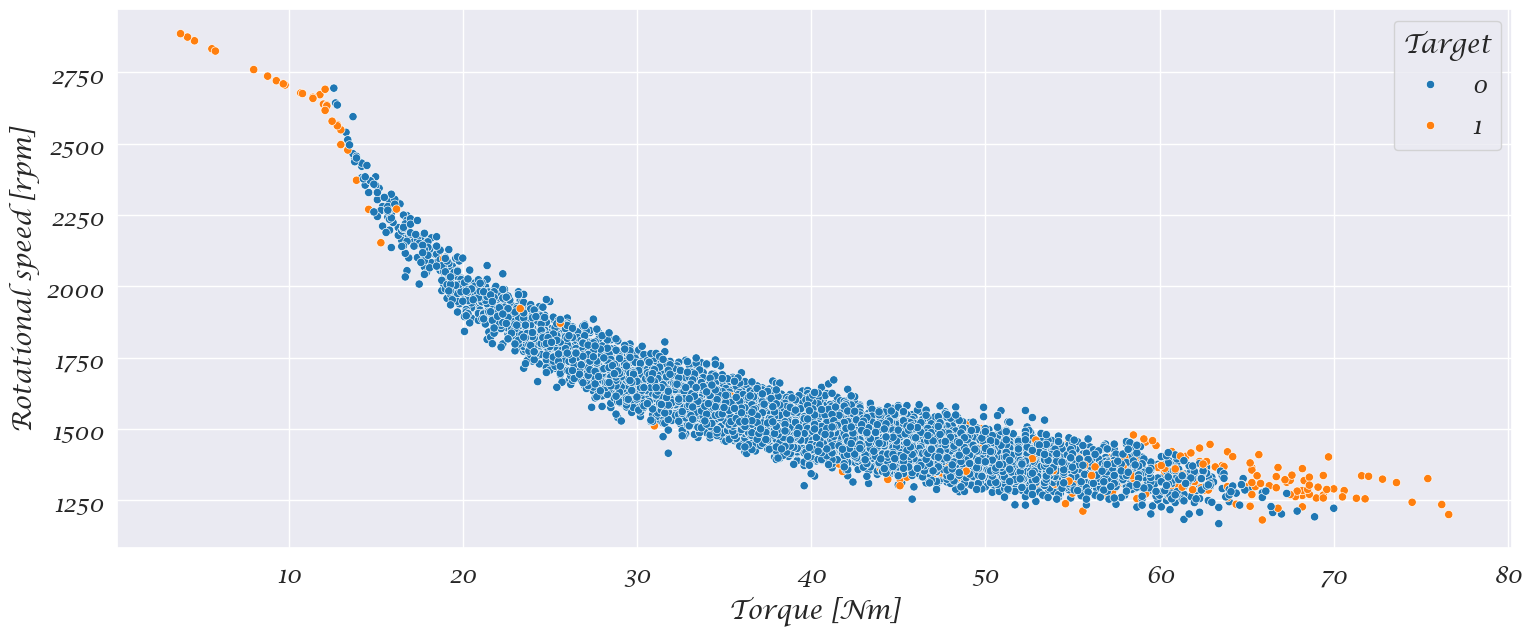

In [53]:
plt.figure(figsize=(18,7))
sns.scatterplot(data=df, x="Torque [Nm]", y="Rotational speed [rpm]", hue="Target",palette="tab10");

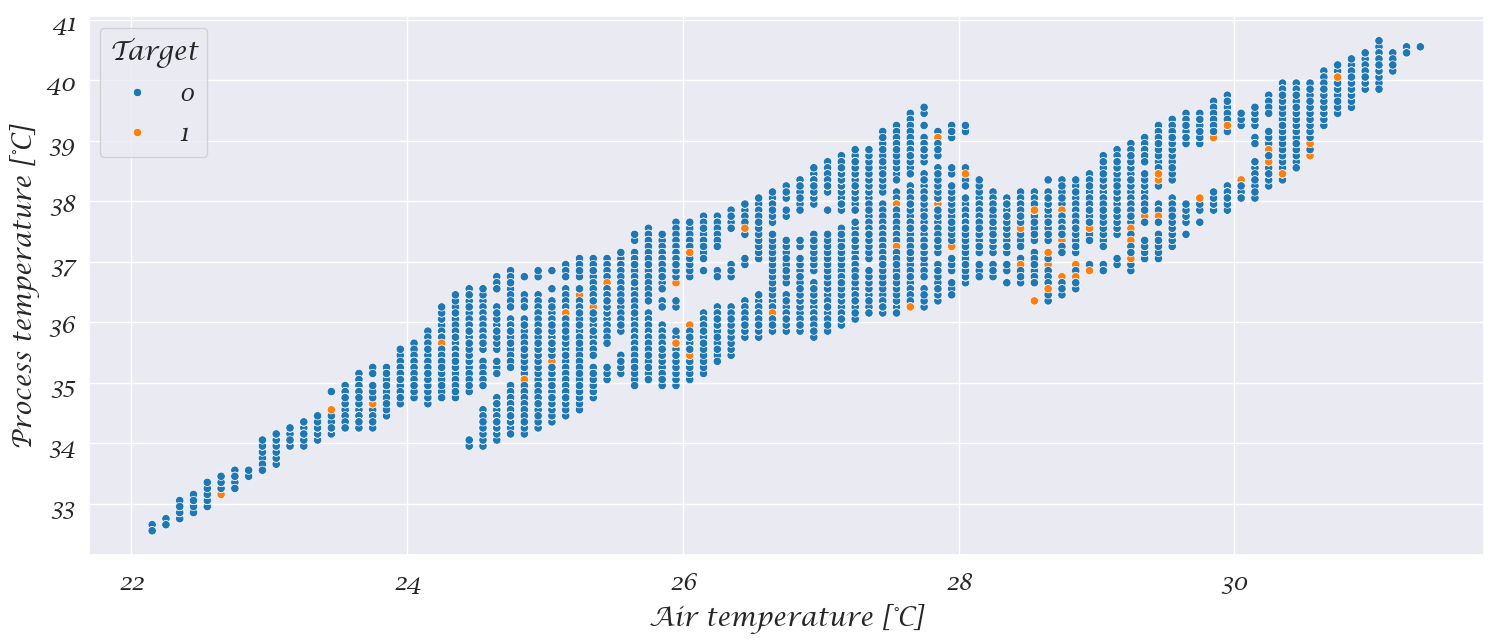

In [54]:
plt.figure(figsize=(18,7))
sns.scatterplot(data=df, x="Air temperature [°C]", y="Process temperature [°C]", hue="Target",palette="tab10");

<font color="BLue" size=+3 face="Comic Sans MS"><div style="text-align: justify">Sélection Des Caractéristiques
</font>

In [55]:
#pour le feature selection , il faut tout d'abord éliminer les données qui ne sont pas utiles et qui ne permettent pas une prédiction 
#on va supprimer les 2 colonnes inutiles
df.drop(['UDI', 'Product ID'], axis=1, inplace=True)
df.head()

,Air temperature [°C],Process temperature [°C],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Type_H,Type_L,Type_M,Failure Type_Heat Dissipation Failure,Failure Type_No Failure,Failure Type_Overstrain Failure,Failure Type_Power Failure,Failure Type_Random Failures,Failure Type_Tool Wear Failure
0,24.95,35.45,1551,42.8,0,0,False,False,True,False,True,False,False,False,False
1,25.05,35.55,1408,46.3,3,0,False,True,False,False,True,False,False,False,False
2,24.95,35.35,1498,49.4,5,0,False,True,False,False,True,False,False,False,False
3,25.05,35.45,1433,39.5,7,0,False,True,False,False,True,False,False,False,False
4,25.05,35.55,1408,40.0,9,0,False,True,False,False,True,False,False,False,False


In [56]:
colonnes_failure_type = [col for col in df.columns if col.startswith('Failure Type')]

# On va diviser les données en caractéristiques 'X' et cible 'y'
colonnes_a_supprimer = colonnes_failure_type + ['Target']
X = df.drop(colonnes_a_supprimer, axis=1)
# Concaténer les colonnes de classe de défaillance binaires en une seule colonne de cible
y = df[colonnes_failure_type]


c:\Users\maria\.virtualenvs\machine_learning-Ybrxw6QX\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
c:\Users\maria\.virtualenvs\machine_learning-Ybrxw6QX\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


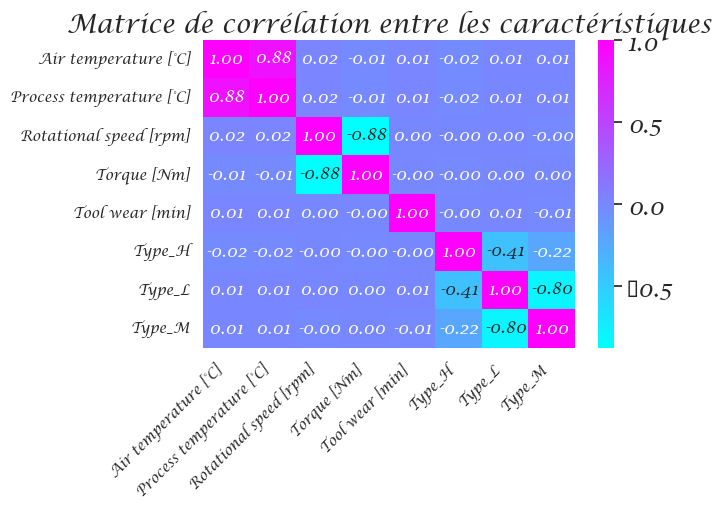

In [57]:
# Calculer la corrélation de Pearson entre les caractéristiques de 'X'
matrice_correlation = X.corr()
plt.figure(figsize=(6, 4))
sns.heatmap(matrice_correlation, annot=True, cmap='cool', fmt='.2f',
            annot_kws={'fontsize': 12}, 
            xticklabels=True, yticklabels=True)
plt.xticks(fontsize=10, rotation=45, ha='right')
plt.yticks(fontsize=10)  

plt.title('Matrice de corrélation entre les caractéristiques')
plt.show()

In [58]:
seuil = 0.8
features_to_remove = set()
for i in range(len(matrice_correlation.columns)):
    for j in range(i + 1, len(matrice_correlation.columns)):
        if abs(matrice_correlation.iloc[i, j]) > seuil:
            # Si la corrélation est supérieure au seuil, ajouter l'une des caractéristiques à la liste à éliminer
            feature1 = matrice_correlation.columns[i]
            feature2 = matrice_correlation.columns[j]
            # Ici, nous supprimons la seconde caractéristique dans la matrice
            features_to_remove.add(feature2)

X_filtré = X.drop(features_to_remove, axis=1)

print(f"Les caractéristiques supprimées sont : {features_to_remove}")
print(f"Nombre de caractéristiques : {X_filtré.shape[1]}")

Les caractéristiques supprimées sont : {'Torque [Nm]', 'Type_M', 'Process temperature [°C]'}
Nombre de caractéristiques : 5


<font color="green" size=+1 face="Comic Sans MS"><div style="text-align: justify">Résultat aprés l'élimination des caractéristiques redondantes
</font>

In [59]:
X_filtré.head(0)

,Air temperature [°C],Rotational speed [rpm],Tool wear [min],Type_H,Type_L


<font color="brown" size=+1 face="Comic Sans MS"><div style="text-align: justify">Matrice de corrélation entre les caractéristiques et la variable cible
</font>

Corrélation entre les caractéristiques et la cible :


c:\Users\maria\.virtualenvs\machine_learning-Ybrxw6QX\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


Text(0.5, 1.0, 'Matrice de corrélation X & y')

c:\Users\maria\.virtualenvs\machine_learning-Ybrxw6QX\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
c:\Users\maria\.virtualenvs\machine_learning-Ybrxw6QX\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


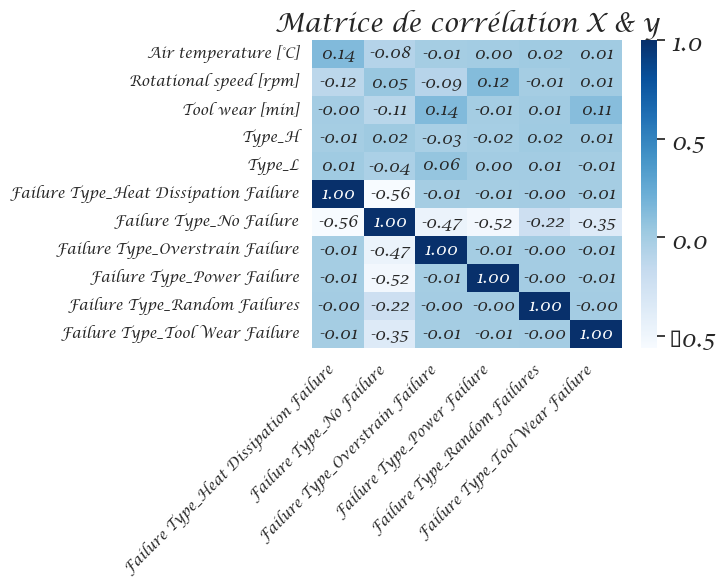

In [60]:
# Concaténer X et y
df_combined = pd.concat([X_filtré, y], axis=1)

# Calculer la corrélation entre les caractéristiques de X et les colonnes de y
correlation_with_target = df_combined.corr().loc[:, colonnes_failure_type]
# Afficher les corrélations avec la cible
print("Corrélation entre les caractéristiques et la cible :")
plt.figure(figsize=(5, 4))
sns.heatmap(correlation_with_target, annot=True, cmap='Blues', fmt='.2f',
            annot_kws={'fontsize': 12}, 
            xticklabels=True, yticklabels=True)
plt.xticks(fontsize=10, rotation=45, ha='right')
plt.yticks(fontsize=10) 
plt.title("Matrice de corrélation X & y")

<font color="green" size=+1 face="Comic Sans MS"><div style="text-align: justify">Choix final des caractéristiques
</font>

In [61]:
# Définir les seuils de corrélation minimale et maximale
correlation_min = 0.1
correlation_max = 0.9

# Filtrer les caractéristiques basées sur les seuils de corrélation avec la cible
selected_features = set()
for col in correlation_with_target.index:
    if col in X.columns:  # Ignorer les colonnes cibles
        for target_col in colonnes_failure_type:
            corr_value = abs(correlation_with_target.loc[col, target_col])
            if correlation_min <= corr_value <= correlation_max:
                selected_features.add(col)
                break

# Filtrer `X` en utilisant `selected_features`
X_filtered = X[list(selected_features)]
print(f"Les caractéristiques finaux sélectionnées sont : ")
X_filtered.head(0)


Les caractéristiques finaux sélectionnées sont : 


,Rotational speed [rpm],Air temperature [°C],Tool wear [min]


<font color="brown" size=+1 face="Comic Sans MS"><div style="text-align: justify">La distribution de chaque caractéristique choisi

</font>

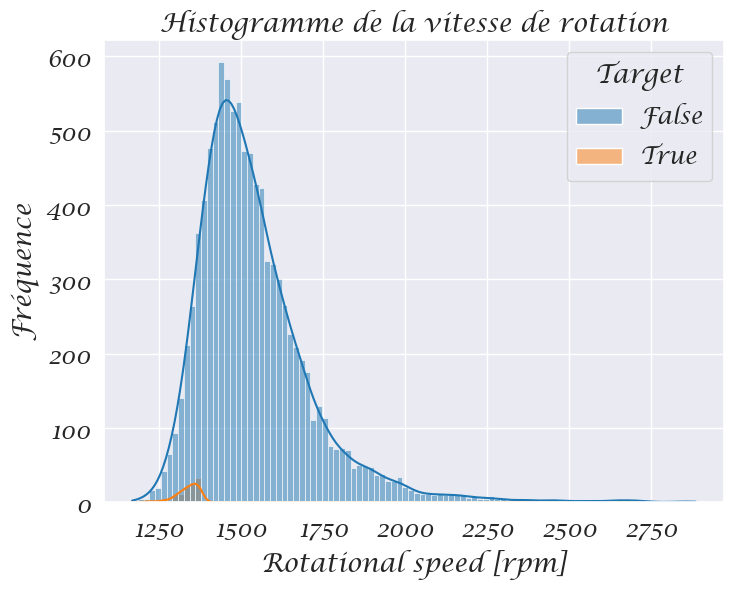

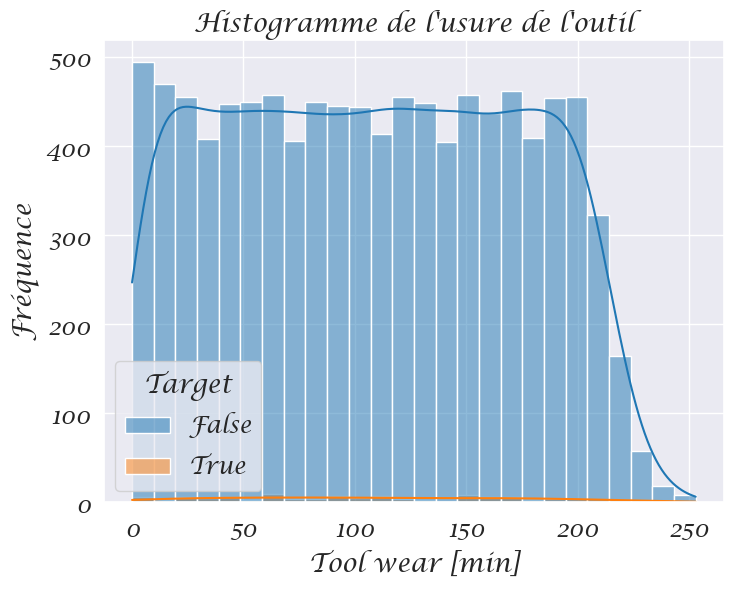

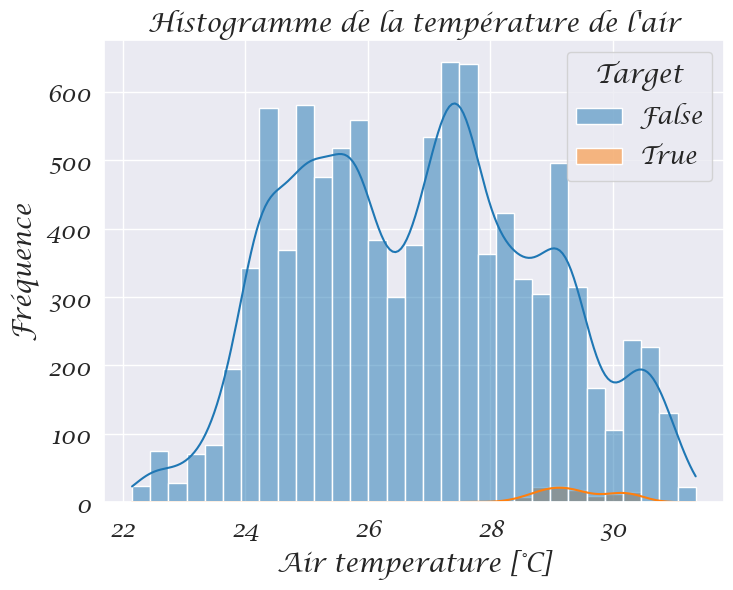

In [62]:
X_with_target = X_filtered.copy()
X_with_target['Target'] = y.iloc[:, 0]  # Sélectionnez la première colonne de y

# Histogramme pour la vitesse de rotation
plt.figure(figsize=(8, 6))
sns.histplot(data=X_with_target, x='Rotational speed [rpm]',hue='Target', kde=True)
plt.title('Histogramme de la vitesse de rotation')
plt.xlabel('Rotational speed [rpm]')
plt.ylabel('Fréquence')
plt.show()

# Histogramme pour l'usure de l'outil
plt.figure(figsize=(8, 6))
sns.histplot(data=X_with_target, x='Tool wear [min]', hue='Target',kde=True)
plt.title('Histogramme de l\'usure de l\'outil')
plt.xlabel('Tool wear [min]')
plt.ylabel('Fréquence')
plt.show()

# Histogramme pour la température de l'air
plt.figure(figsize=(8, 6))
sns.histplot(data=X_with_target, x='Air temperature [°C]',hue='Target', kde=True)
plt.title('Histogramme de la température de l\'air')
plt.xlabel('Air temperature [°C]')
plt.ylabel('Fréquence')
plt.show()

#kde=True ajoute une estimation de la densité de noyau, ce qui peut vous aider à voir la forme de la distribution
#la fréquence :le nombre de fois qu’une valeur ou un intervalle de valeurs apparaît dans un ensemble de données.


<font color="Blue" size=+3 face="Comic Sans MS"><div style="text-align: justify">Prétraitement Des Données
</font>

<font color="brown" size=+1 face="Comic Sans MS"><div style="text-align: justify">Normalisation des données
</font>

In [63]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

#error : object df has no argument ARGMAX
if isinstance(y, pd.DataFrame):
    y = y.idxmax(axis=1)  # Prendre l'index max de chaque ligne
elif isinstance(y, np.ndarray) and y.ndim == 2:
    y = np.argmax(y, axis=1)  # Prendre l'index max de chaque ligne

scaler = StandardScaler()
X_train, X_test, y_train, y_test_1 = train_test_split(X_filtered, y, test_size=0.2, random_state=42)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) 



<font color="BLue" size=+3 face="Comic Sans MS"><div style="text-align: justify">Rééchantillonnage des données
</font>

In [64]:
from imblearn.combine import SMOTEENN

random_state_resampling = 42 
smote_enn = SMOTEENN(random_state=random_state_resampling)
X_train_comb, y_train_comb = smote_enn.fit_resample(X_train_scaled, y_train)
print('Après combinaison SMOTE + ENN, décompte des classes :', dict(pd.Series(y_train_comb).value_counts()))
X_train_1, X_test, y_train_1, y_test = train_test_split(X_train_comb, y_train_comb, test_size=0.2, random_state=42)
#total test : 8714

Après combinaison SMOTE + ENN, décompte des classes : {'Failure Type_Tool Wear Failure': 7615, 'Failure Type_Random Failures': 7600, 'Failure Type_Overstrain Failure': 7569, 'Failure Type_Heat Dissipation Failure': 7525, 'Failure Type_Power Failure': 7196, 'Failure Type_No Failure': 6064}


<font color="BLue" size=+3 face="Comic Sans MS"><div style="text-align: justify">Test des algorithmes de classification 
</font>

<font color="lime" size=+2 face="Comic Sans MS"><div style="text-align: justify">Algorithme de Régression logistique 
</font>

In [65]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

Précision de la régression logistique: 65.84%
                                       precision    recall  f1-score   support

Failure Type_Heat Dissipation Failure       0.73      0.90      0.80      1548
              Failure Type_No Failure       0.39      0.24      0.30      1209
      Failure Type_Overstrain Failure       0.73      0.86      0.79      1502
           Failure Type_Power Failure       0.62      0.37      0.47      1373
         Failure Type_Random Failures       0.49      0.61      0.54      1545
       Failure Type_Tool Wear Failure       0.87      0.84      0.86      1537

                             accuracy                           0.66      8714
                            macro avg       0.64      0.64      0.63      8714
                         weighted avg       0.65      0.66      0.64      8714



Text(0.5, 1.0, 'Matrice de confusion (Régression Logistique)')

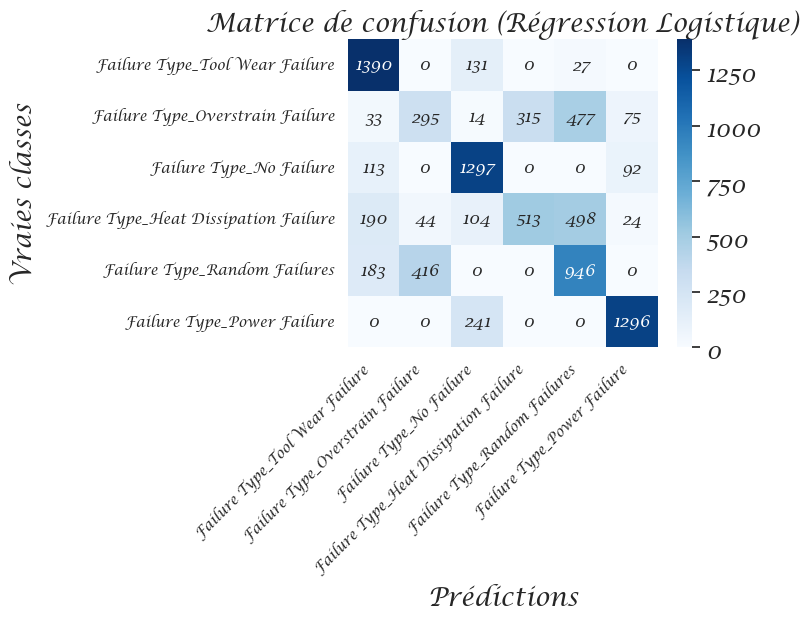

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier

# Convert pandas Series to numpy array to ensure it has 2 dimensions
y_train_comb_array = np.array(y_train_1)
y_train_2 = y_train_comb_array.reshape(-1, 1)

model_lr = MultiOutputClassifier(LogisticRegression(multi_class='multinomial', solver='lbfgs', C=1.0))
model_lr.fit(X_train_1, y_train_2)
y_pred_lr = model_lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_lr)
print(f"Précision de la régression logistique: {accuracy * 100:.2f}%")
print(classification_report(y_test, y_pred_lr))
#######################################################################################################
#unique() : pr tirer les noms des classes
class_labels = y_test.unique().tolist()   
confusion_mat_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_mat_lr, annot=True, cmap='Blues', fmt='.0f', 
            annot_kws={'fontsize': 12}, 
            xticklabels=class_labels, yticklabels=class_labels)
plt.xticks(fontsize=10, rotation=45, ha='right')
plt.yticks(fontsize=10)
plt.xlabel('Prédictions')
plt.ylabel('Vraies classes')
plt.title("Matrice de confusion (Régression Logistique)")

<font color="lime" size=+2 face="Comic Sans MS"><div style="text-align: justify">Algorithme d'arbre de décision 
</font>

Précision de l'arbre de décision: 98.00%
                                       precision    recall  f1-score   support

Failure Type_Heat Dissipation Failure       0.98      0.99      0.99      1548
              Failure Type_No Failure       0.98      0.94      0.96      1209
      Failure Type_Overstrain Failure       0.99      0.99      0.99      1502
           Failure Type_Power Failure       0.97      0.98      0.98      1373
         Failure Type_Random Failures       0.97      0.99      0.98      1545
       Failure Type_Tool Wear Failure       0.99      0.99      0.99      1537

                             accuracy                           0.98      8714
                            macro avg       0.98      0.98      0.98      8714
                         weighted avg       0.98      0.98      0.98      8714



Text(0.5, 1.0, 'Matrice de confusion (Arbre de décision)')

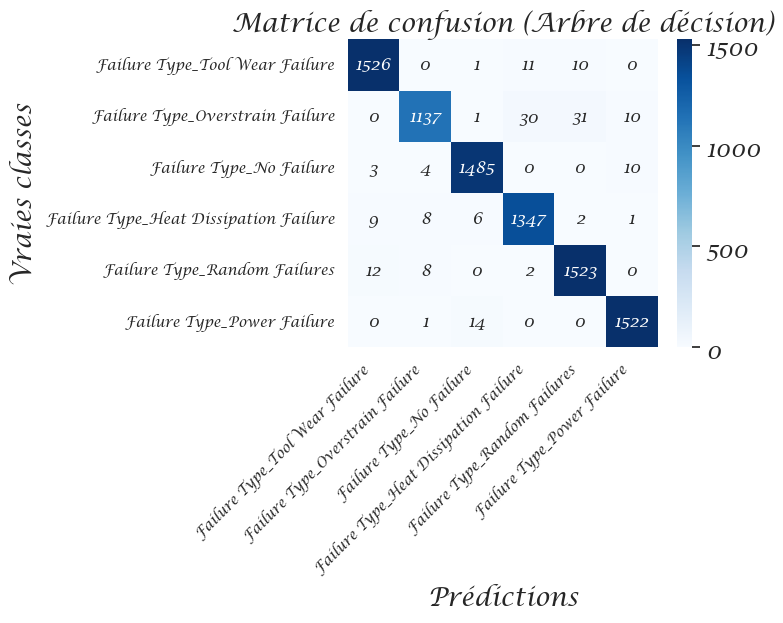

In [67]:
from sklearn.tree import DecisionTreeClassifier

modele_arbre = DecisionTreeClassifier(random_state=42)
modele_arbre.fit(X_train_1, y_train_1)
y_pred_dec = modele_arbre.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_dec)
print(f"Précision de l'arbre de décision: {accuracy * 100:.2f}%")
print(classification_report(y_test, y_pred_dec))
#######################################################################################################
confusion_mat_dec = confusion_matrix(y_test, y_pred_dec)
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_mat_dec, annot=True, cmap='Blues', fmt='.0f', 
            annot_kws={'fontsize': 12}, 
            xticklabels=class_labels, yticklabels=class_labels)
plt.xticks(fontsize=10, rotation=45, ha='right')
plt.yticks(fontsize=10)
plt.xlabel('Prédictions')
plt.ylabel('Vraies classes')
plt.title("Matrice de confusion (Arbre de décision)")

<font color="lime" size=+2 face="Comic Sans MS"><div style="text-align: justify">Algorithme de forêt aléatoire 
</font>

Précision du modèle Random Forest : 98.86%
                                       precision    recall  f1-score   support

Failure Type_Heat Dissipation Failure       0.99      1.00      0.99      1548
              Failure Type_No Failure       1.00      0.95      0.98      1209
      Failure Type_Overstrain Failure       0.99      1.00      0.99      1502
           Failure Type_Power Failure       0.98      0.98      0.98      1373
         Failure Type_Random Failures       0.99      1.00      0.99      1545
       Failure Type_Tool Wear Failure       0.99      0.99      0.99      1537

                             accuracy                           0.99      8714
                            macro avg       0.99      0.99      0.99      8714
                         weighted avg       0.99      0.99      0.99      8714



Text(0.5, 1.0, 'Matrice de confusion (Forêt aléatoire)')

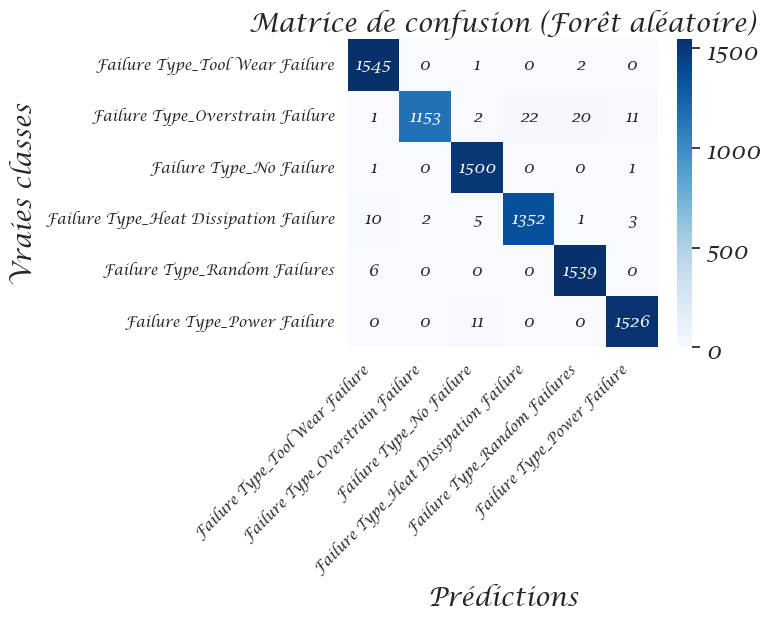

In [68]:
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train_1, y_train_1)
y_pred_fa = random_forest_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_fa)
print(f"Précision du modèle Random Forest : {accuracy * 100:.2f}%")
print(classification_report(y_test, y_pred_fa))
#######################################################################################################
confusion_mat_fa = confusion_matrix(y_test, y_pred_fa)
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_mat_fa, annot=True, cmap='Blues', fmt='.0f', 
            annot_kws={'fontsize': 12}, 
            xticklabels=class_labels, yticklabels=class_labels)
plt.xticks(fontsize=10, rotation=45, ha='right')
plt.yticks(fontsize=10)
plt.xlabel('Prédictions')
plt.ylabel('Vraies classes')
plt.title("Matrice de confusion (Forêt aléatoire)")

<font color="lime" size=+2 face="Comic Sans MS"><div style="text-align: justify">Algorithme de SVM
</font>

Précision du modèle SVM: 72.81%
                                       precision    recall  f1-score   support

Failure Type_Heat Dissipation Failure       0.67      0.94      0.78      1548
              Failure Type_No Failure       0.73      0.50      0.60      1209
      Failure Type_Overstrain Failure       0.77      0.85      0.81      1502
           Failure Type_Power Failure       0.96      0.37      0.54      1373
         Failure Type_Random Failures       0.58      0.75      0.65      1545
       Failure Type_Tool Wear Failure       0.89      0.87      0.88      1537

                             accuracy                           0.73      8714
                            macro avg       0.76      0.71      0.71      8714
                         weighted avg       0.76      0.73      0.72      8714



Text(0.5, 1.0, 'Matrice de confusion SVM')

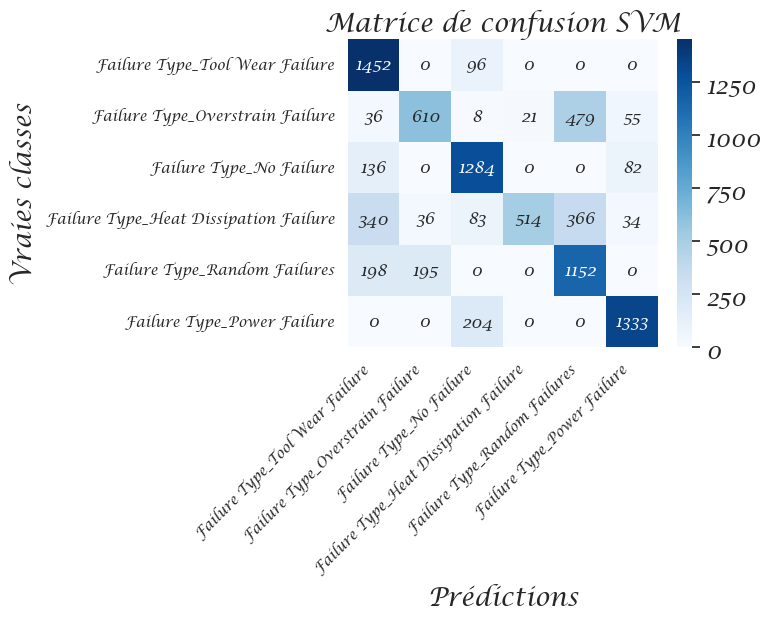

In [69]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear', C=1.0)  
# C :le degré de régularisation (pénalisation pour les erreurs de classification) , linear: lorsque les données sont linéairement séparables
#On va entraîner le modèle sur l'ensemble d'entraînement
svm_model.fit(X_train_1, y_train_1)
y_pred_svm = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_svm)
print(f"Précision du modèle SVM: {accuracy * 100:.2f}%")
print(classification_report(y_test, y_pred_svm))
#######################################################################################################
confusion_mat = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_mat, annot=True, cmap='Blues', fmt='.0f', 
            annot_kws={'fontsize': 12}, 
            xticklabels=class_labels, yticklabels=class_labels)
plt.xticks(fontsize=10, rotation=45, ha='right')
plt.yticks(fontsize=10)
plt.xlabel('Prédictions')
plt.ylabel('Vraies classes')
plt.title("Matrice de confusion SVM")


<font color="blue" size=+3 face="Comic Sans MS"><div style="text-align: justify">Evaluation des modéles
</font>

<font color="lime" size=+2 face="Comic Sans MS"><div style="text-align: justify">La validation croisée
</font>
<font color="black" size=2 face="Comic Sans MS"><div style="text-align: justify">en calculant la précision moyenne sur plusieurs plis de validation
</font>

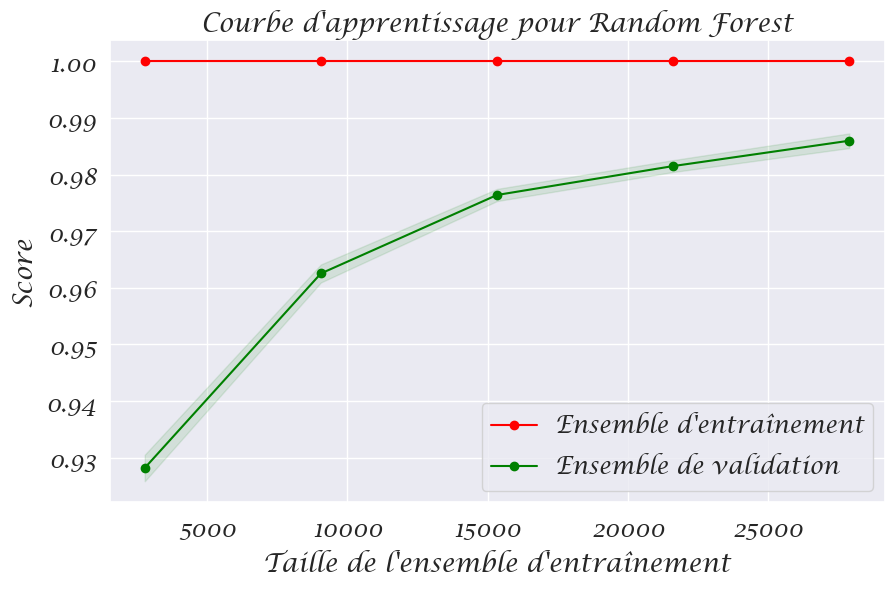

In [70]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(random_forest_model, X_train_1, y_train_1, cv=5)

# Calculer les moyennes et les écarts-types des scores pour les ensembles d'entraînement et de test
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Tracer la courbe d'apprentissage
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Ensemble d'entraînement")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Ensemble de validation")
plt.xlabel('Taille de l\'ensemble d\'entraînement')
plt.ylabel('Score')
plt.title('Courbe d\'apprentissage pour Random Forest')
plt.legend(loc="best")
plt.show()


In [71]:
from sklearn.model_selection import cross_val_score

scores =cross_val_score(model_lr, X_train_1, y_train_2, cv=5) #array list
print("Scores de performance pour le modèle Régression logistique")
print([round(score, 4) for score in scores])
mean_score = round(scores.mean(), 4)
print("Score moyen de performance :", mean_score)

Scores de performance pour le modèle Régression logistique
[0.6574, 0.6498, 0.6539, 0.6576, 0.6494]
Score moyen de performance : 0.6536


In [72]:
scores = cross_val_score(modele_arbre, X_train_1, y_train_1, cv=5)
print("Scores de performance pour le modèle Arbre de décision")
print([round(score, 4) for score in scores]) 
mean_score = round(scores.mean(), 4)
print("Score moyen de performance :", mean_score)

Scores de performance pour le modèle Arbre de décision
[0.9753, 0.9762, 0.9776, 0.9772, 0.976]
Score moyen de performance : 0.9765


In [73]:
scores = cross_val_score(random_forest_model, X_train_1, y_train_1, cv=5)
print("Scores de performance pour le modèle Forêt aléatoire")
print([round(score, 4) for score in scores])
mean_score = round(scores.mean(), 4)
print("Score moyen de performance :", mean_score)

Scores de performance pour le modèle Forêt aléatoire
[0.9848, 0.9842, 0.9877, 0.9862, 0.9869]
Score moyen de performance : 0.986


In [74]:
scores = cross_val_score(svm_model, X_train_1, y_train_1, cv=5)
print("Scores de performance pour le modèle SVM")
print([round(score, 4) for score in scores])
mean_score = round(scores.mean(), 4)
print("Score moyen de performance :", mean_score)

Scores de performance pour le modèle SVM
[0.723, 0.7277, 0.7283, 0.7191, 0.7191]
Score moyen de performance : 0.7235


<font color="blue" size=+3 face="Comic Sans MS"><div style="text-align: justify">Vérification des modéles 
</font>
<font color="black" size=2 face="Comic Sans MS"><div style="text-align: justify">Évaluation des performances sur l'ensemble de test
</font>

In [75]:
#ValueError: y must have at least two dimensions for multi target classification but has only one
y_test_comb_array = np.array(y_test)
y_test_2 = y_test_comb_array.reshape(-1, 1)

test_accuracy = model_lr.score(X_test, y_test_2)
print("Précision sur l'ensemble de test de régression logistique :", round(test_accuracy, 4))


Précision sur l'ensemble de test de régression logistique : 0.6584


In [76]:
test_accuracy = modele_arbre.score(X_test, y_test)
print("Précision sur l'ensemble de test d'arbre de décision:", round(test_accuracy, 4))

Précision sur l'ensemble de test d'arbre de décision: 0.98


In [77]:
test_accuracy = random_forest_model.score(X_test, y_test)
print("Précision sur l'ensemble de test de forêt aléatoire:", round(test_accuracy, 4))

Précision sur l'ensemble de test de forêt aléatoire: 0.9886


In [78]:
test_accuracy = svm_model.score(X_test, y_test)
print("Précision sur l'ensemble de test de SVM :", round(test_accuracy, 4))

Précision sur l'ensemble de test de SVM : 0.7281


<span class="label label-default" style="background-color:#DC1010; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:28px; color:#FBFAFC; ">Résultat 📚</span>

In [79]:
y_pred = random_forest_model.predict(X_test_scaled)
cross_checking = pd.DataFrame({'Actuel' : y_test_1 , 'Prédit' : y_pred})
styled_cross_checking = cross_checking.sample(10).style.background_gradient(cmap='coolwarm')
styled_cross_checking.set_table_styles([{'selector': 'th', 'props': [('color', 'blue'), ('text-align', 'center')]}])
styled_cross_checking.set_properties(subset=pd.IndexSlice[:, :], **{'color': 'black', 'font-family': 'Lucida Calligraphy', 'font-size': '15px'})

,Actuel,Prédit
3023,Failure Type_No Failure,Failure Type_Tool Wear Failure
9942,Failure Type_No Failure,Failure Type_No Failure
2611,Failure Type_No Failure,Failure Type_No Failure
965,Failure Type_No Failure,Failure Type_No Failure
8749,Failure Type_No Failure,Failure Type_No Failure
2982,Failure Type_No Failure,Failure Type_No Failure
2885,Failure Type_No Failure,Failure Type_Power Failure
4220,Failure Type_No Failure,Failure Type_Heat Dissipation Failure
6216,Failure Type_No Failure,Failure Type_No Failure
3007,Failure Type_No Failure,Failure Type_No Failure


In [80]:
vraies_predictions = sum(y_pred == y_test_1)
print("Nombre de prédictions vraies :", vraies_predictions)
fausses_predictions = sum(y_pred != y_test_1)
print("Nombre de prédictions fausses :", fausses_predictions)

Nombre de prédictions vraies : 1608
Nombre de prédictions fausses : 392
